<a href="https://colab.research.google.com/github/mrdesautu/Machine-Learning/blob/main/Reducci%C3%B3n_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **APRENDIZAJE NO SUPERVISADO**

### **Reducción de dimensionalidad**

En este notebook veremos, dentro de la técnica de `reducción de dimensionalidad`, dos algoritmos: SVD y PCA.

### **`SVD`**

**Compresión de imagen**

SVD puede ser usado en el contexto de imágenes para la compresión.

Si en lugar de guardar la foto entera -Matriz M-, guardamos una representación reducida de esta matriz -B- y la manera de pasar de un espacio a otro -V*-, entonces se podría ahorrar mucho espacio a la hora de guardar la imagen.


El formalismo de SVD nos asegura que dado el rango que eligamos (r), la foto que podamos reconstruir a partir de B y V* (M virgulilla) será la *más parecida* posible a la imagen original (M).


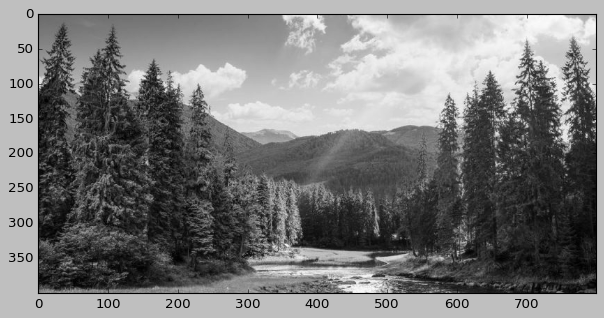

In [6]:
# Cargamos la imagen

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')
img = Image.open('/content/bosque.jpg')

imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float)

imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [7]:
imgmat.shape

(400, 800)

In [8]:
import numpy as np
import pandas as pd

U, D, V = np.linalg.svd(imgmat)

# Si multiplicamos los 3 elementos, obtendríamos la imagen original

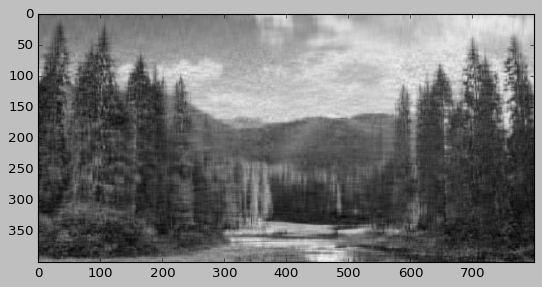

In [9]:
v = 30
reconstimg = np.matrix(U[:, :v]) * np.diag(D[:v]) * np.matrix(V[:v, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

In [ ]:
#Ejemplo SVD con una matriz de 7 filas por 4 columnas.

matriz = ([     [10,  9, 2, 0],
                [ 9,  8, 1, 1],
                [ 1,  2, 3, 2],
                [ 0,  2, 0, 1],
                [ 5,  6, 5, 5],
                [ 5,  4, 9, 9],
                [ 4,  6, 8,10]])

In [ ]:
mU, mD, mV = np.linalg.svd(matriz)

In [ ]:
for i in [1, 2, 3, 4]:
    matizresultante = np.matrix(mU[:, :i]) * np.diag(mD[:i])# * np.matrix(mV[:i, :])
    print("Matriz ", i, ":\n",matizresultante)

Matriz  1 :
 [[-11.16011545]
 [-10.0839765 ]
 [ -3.90807933]
 [ -1.55292459]
 [-10.51191096]
 [-13.06994253]
 [-13.63559774]]
Matriz  2 :
 [[-11.16011545   7.74862982]
 [-10.0839765    6.69340669]
 [ -3.90807933  -1.30111364]
 [ -1.55292459   0.169343  ]
 [-10.51191096  -0.42400061]
 [-13.06994253  -5.47536013]
 [-13.63559774  -5.36318123]]
Matriz  3 :
 [[-1.11601154e+01  7.74862982e+00  4.40714361e-01]
 [-1.00839765e+01  6.69340669e+00 -1.85446502e-01]
 [-3.90807933e+00 -1.30111364e+00 -1.29073558e-02]
 [-1.55292459e+00  1.69342996e-01 -1.59474143e+00]
 [-1.05119110e+01 -4.24000606e-01 -4.40128473e-01]
 [-1.30699425e+01 -5.47536013e+00  1.47121795e+00]
 [-1.36355977e+01 -5.36318123e+00 -1.10912421e+00]]
Matriz  4 :
 [[-1.11601154e+01  7.74862982e+00  4.40714361e-01  4.65112824e-01]
 [-1.00839765e+01  6.69340669e+00 -1.85446502e-01 -6.90893959e-01]
 [-3.90807933e+00 -1.30111364e+00 -1.29073558e-02  1.01678546e+00]
 [-1.55292459e+00  1.69342996e-01 -1.59474143e+00  1.28638849e-01]
 [-1.

In [ ]:
i = 4
matizresultante = np.matrix(mU[:, :i]) * np.diag(mD[:i]) * np.matrix(mV[:i, :])
print("Matriz ", i, ":\n",matizresultante)

Matriz  4 :
 [[ 1.00000000e+01  9.00000000e+00  2.00000000e+00 -4.67123690e-15]
 [ 9.00000000e+00  8.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  3.00000000e+00  2.00000000e+00]
 [-2.76286755e-17  2.00000000e+00  9.34623207e-16  1.00000000e+00]
 [ 5.00000000e+00  6.00000000e+00  5.00000000e+00  5.00000000e+00]
 [ 5.00000000e+00  4.00000000e+00  9.00000000e+00  9.00000000e+00]
 [ 4.00000000e+00  6.00000000e+00  8.00000000e+00  1.00000000e+01]]


In [ ]:
reconstimg.reshape(reconstimg.size)

matrix([[97.89910925, 93.87590473, 93.61202797, ..., 75.52943273,
         72.50081527, 64.85350929]])

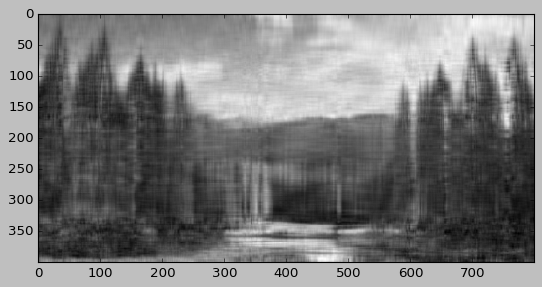

In [ ]:
i = 15
reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

No es muy óptimo el resultado obtenido, pero ya se logra vislumbrar al menos la idea de la imagen. Tengamos en cuenta que contamos con poca información.

Probemos, ahora, una cantidad más razonable de valores singulares y comprobemos los resultados.

In [ ]:
A = reconstimg.reshape((reconstimg.size,))
A.shape

(1, 320000)

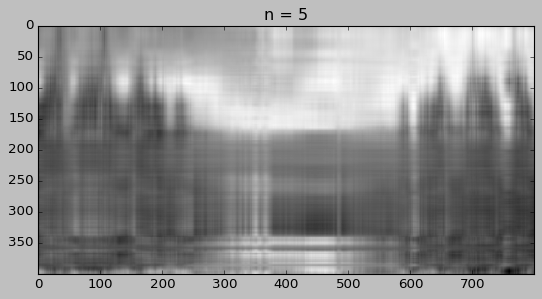

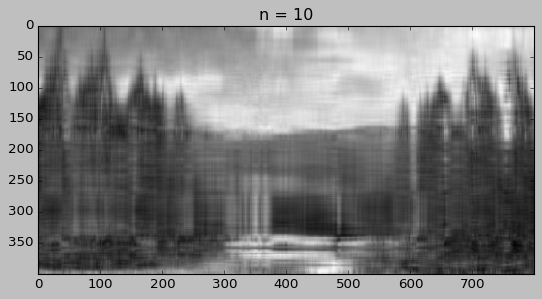

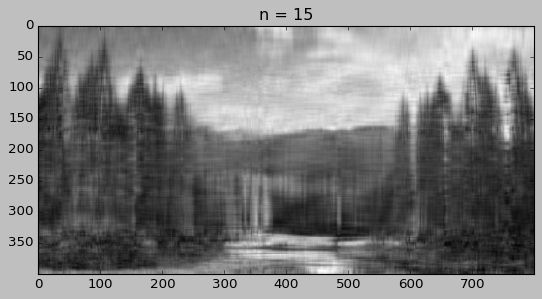

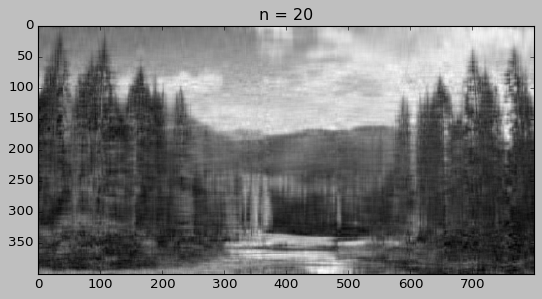

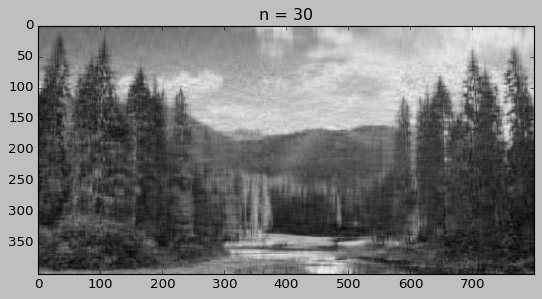

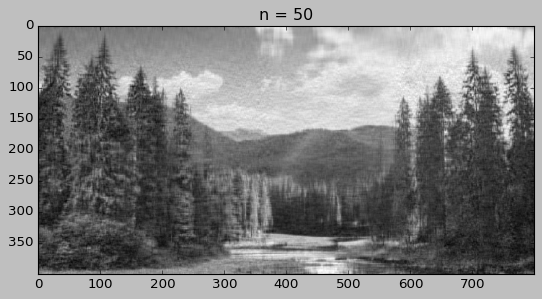

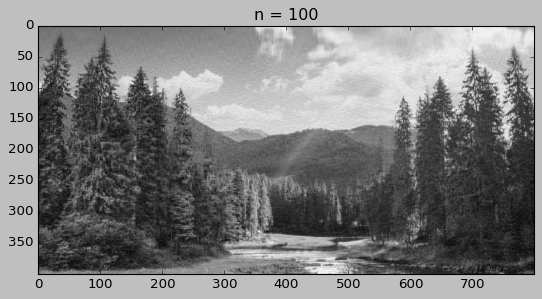

In [ ]:
for i in [5, 10, 15, 20, 30, 50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

- - -
### **`PCA`**

La reducción de dimensionalidad puede pensarse como una parte del preprocesamiento de datos, es decir, de mejora de los features que utilizará un modelo predictivo.

A continuación, mostraremos un ejemplo donde selecionamos a mano una combinación de features que mejoran el rendimiento de un modelo.

In [11]:
import seaborn as sns
sns.set()

In [10]:
# Cargamos el dataset que usaremos

data = pd.read_csv('/content/Clase_05_PCA.csv', index_col = 0)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


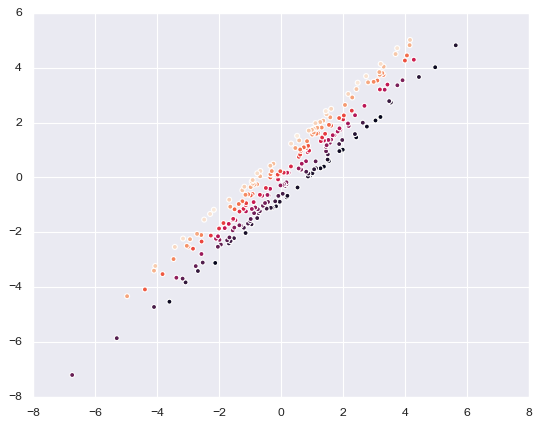

In [ ]:
plt.scatter(data['x1'], data['x2'], c = data['y'])
plt.show()

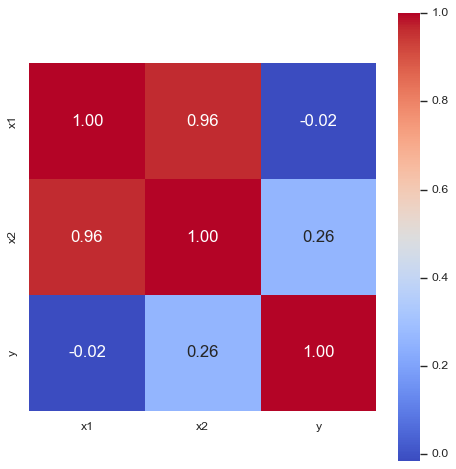

In [ ]:
# Hacemos un mapa de calor

corr = data.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns,
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

Podemos ver que los atributos están muy correlacionados entre sí pero poco correlacionados con la etiqueta *y* que queremos predecir.

Entrenemos un árbol de decisión para apredecir el valor de y.

In [ ]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Separamos los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instanciamos y entrenamos

regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train,y_train)

# Predecimos

y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

# Evaluamos

print('MSE en train:', mean_squared_error(y_train,y_train_pred))
print('MSE en test:', mean_squared_error(y_test,y_test_pred))


MSE en train: 0.3187732833599862
MSE en test: 0.30794908845942776


**El modelo no predice muy bien. Eso se debe a que no hemos hecho una ingeniería de features**

In [ ]:
# Probamos agregar un nuevo atributo con la información que nos brindan los dos que ya tenemos

data['x_nuevo'] = data['x2'] - data['x1']
X_new = data['x_nuevo'].values

In [ ]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

# Instanciamos el modelo y entramos
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train.reshape(-1,1),y_train)

# Predecimos
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

# Evaluamos
print('MSE en train:', mean_squared_error(y_train,y_train_pred))
print('MSE en test:', mean_squared_error(y_test,y_test_pred))

MSE en train: 0.0805587181170301
MSE en test: 0.09314442905377453


**Fíjense cómo mejoró, ahora, sustancialmente nuestro modelo**.

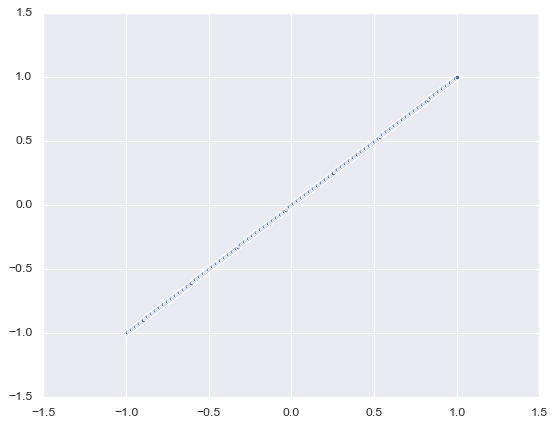

In [ ]:
# Ploteamos un gráfico de dispersión con el atributo nuevo y la variable de salida

plt.scatter(data['x_nuevo'], data['y'])
plt.show()

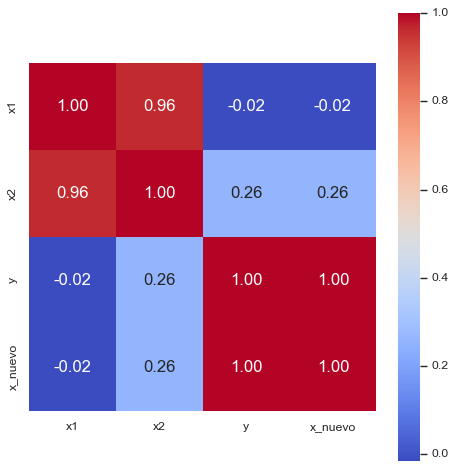

In [ ]:
# Volvemos a hacer el mapa de calor. Recordá que ahora tenemos 3 atributos

corr = data.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns,
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

**`Por supuesto que la idea no es hacer esto a mano, sino de manera automática. Aquí es donde entra en juego el algoritmo PCA`**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_nuevo = pca.fit_transform(X)

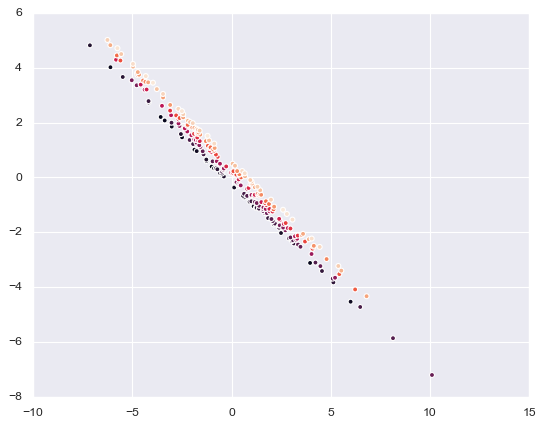

In [ ]:
plt.scatter(X_nuevo[:,0], X[:,1], c = y)
plt.show()

In [ ]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

# Instanciamos el modelo y lo entrenamos
regresor2 = DecisionTreeRegressor(max_depth=1)
regresor2.fit(X_train,y_train)

# Predecimos
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

# Evaluamos
print('MSE en train:', mean_squared_error(y_train,y_train_pred))
print('MSE en test:', mean_squared_error(y_test,y_test_pred))

MSE en train: 0.5940713347330022
MSE en test: 0.6988341165412667


In [ ]:
# Nos fijamos qué feature fue el más importante a la hora de predecir

regresor2.feature_importances_

array([1.])

Una aplicación notoria de la aplicación de PCA tiene que ver con la llama _yield curve_. Esta curva representa la estructura que tienen las tasas de interés de una entidad.

La forma más común de realizar pricing de un bono es utilizando su yield to maturity. La YTM es la tasa de interés que deja el valor de los flujos de fondos descontados, incluyendo la inversión inicial, en cero. Conociendo el flujo de caja, la fecha de liquidación y el precio de un bono, se puede conseguir la YTM. Inversamente, teniendo el flujo de caja, fecha de liquidación y YTM, podemos calcular el precio de este. Es muy importante saber que la relación entre precio y YTM o TIR es una relación inversa. A mayor precio menor la TIR, ya que estamos pagando más por un mismo flujo de caja.

In [13]:
rates = pd.read_csv('/content/Yield_Curve.csv')
rates

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,09/01/2022,2.53,2.80,2.97,3.34,3.51,3.51,3.54,3.39,3.36,3.26,3.64,3.37
1,08/31/2022,2.40,2.72,2.96,3.32,3.50,3.45,3.46,3.30,3.25,3.15,3.53,3.27
2,08/30/2022,2.43,2.73,2.97,3.31,3.48,3.46,3.47,3.27,3.22,3.11,3.49,3.23
3,08/29/2022,2.45,2.75,2.97,3.32,3.43,3.42,3.45,3.27,3.21,3.12,3.50,3.25
4,08/26/2022,2.39,2.69,2.89,3.26,3.36,3.37,3.40,3.20,3.14,3.04,3.44,3.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,01/07/2022,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
164,01/06/2022,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
165,01/05/2022,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
166,01/04/2022,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07


In [ ]:
rates.Date = pd.to_datetime(rates.Date)

rates.index = rates.Date

rates.drop(['Date'], axis =1, inplace =True)

In [ ]:
rates.sort_values('Date', inplace = True)

In [ ]:
rates

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,2.39,2.69,2.89,3.26,3.36,3.37,3.40,3.20,3.14,3.04,3.44,3.21
2022-08-29,2.45,2.75,2.97,3.32,3.43,3.42,3.45,3.27,3.21,3.12,3.50,3.25
2022-08-30,2.43,2.73,2.97,3.31,3.48,3.46,3.47,3.27,3.22,3.11,3.49,3.23


In [ ]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
rates_std = StandardScaler().fit_transform(rates)

In [ ]:
rates_std

array([[-0.92806373, -1.07760745, -1.20526665, ..., -1.83321512,
        -1.76658316, -1.77265573],
       [-0.91605366, -1.08878954, -1.20526665, ..., -1.77428284,
        -1.66721064, -1.63362391],
       [-0.92806373, -1.07760745, -1.19436279, ..., -1.67606235,
        -1.62746163, -1.58727997],
       ...,
       [ 1.93033252,  1.90801082,  1.94595072, ...,  1.07411112,
         1.09534544,  1.05432465],
       [ 1.89430232,  1.89682873,  1.93504685, ...,  1.1526875 ,
         1.17484346,  1.14701253],
       [ 2.05043321,  1.98628545,  1.94595072, ...,  1.36877256,
         1.39346301,  1.37873223]])

In [ ]:
pca = PCA(n_components = 5)
bondpca = pca.fit_transform(rates_std)
dfpca = pd.DataFrame(data = bondpca, columns = ['Componente 1','Componente 2','Componente 3','Componente 4',
                                               'Componente 5'])
dfpca.head()

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5
0,5.713217,1.029414,-0.409497,-0.108208,0.034213
1,5.634335,0.953587,-0.551892,-0.068793,0.002894
2,5.456753,0.831444,-0.501972,-0.111132,0.002245
3,5.352647,0.764019,-0.425846,-0.137486,0.018702
4,5.270257,0.695711,-0.478873,-0.166068,0.022541


Recordemos que el análisis de componentes principales busca reducir la dimensionalidad de los datos. Por este motivo, podemos elegir el número de componentes que expliquen el mayor porcentaje de la varianza acumulado. Esto puede verse también a través de un scree plot donde se grafica el porcentaje de la varianza explicada contra cada componente y se elije una cantidad n de componentes donde se produzca un "codo".

In [ ]:
print(pca.explained_variance_ratio_)

[9.00473142e-01 9.10572859e-02 6.13338983e-03 1.10196448e-03
 7.72161262e-04]


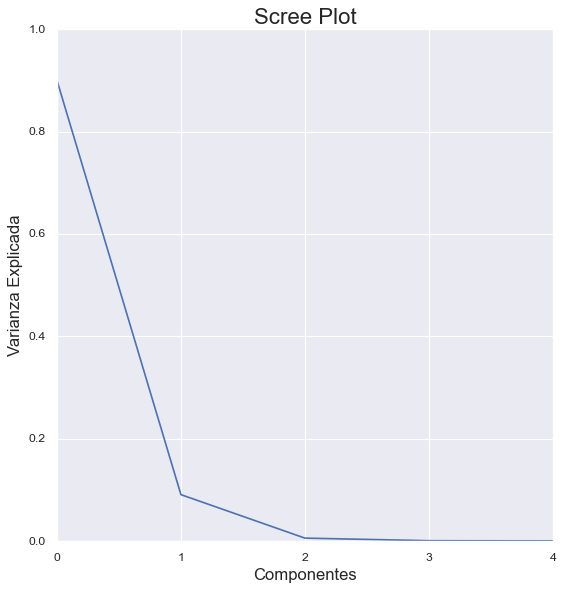

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_ylabel('Varianza Explicada', fontsize = 15)
ax.set_title('Scree Plot', fontsize = 20)
plt.xticks(np.arange(0, 5, step=1))
plt.plot(pca.explained_variance_ratio_)

En el análisis empírico de la curva de bonos, se reconocen 3 componentes principales como importantes. El primero de nivel, el segundo de pendiente y el tercero de curvatura.



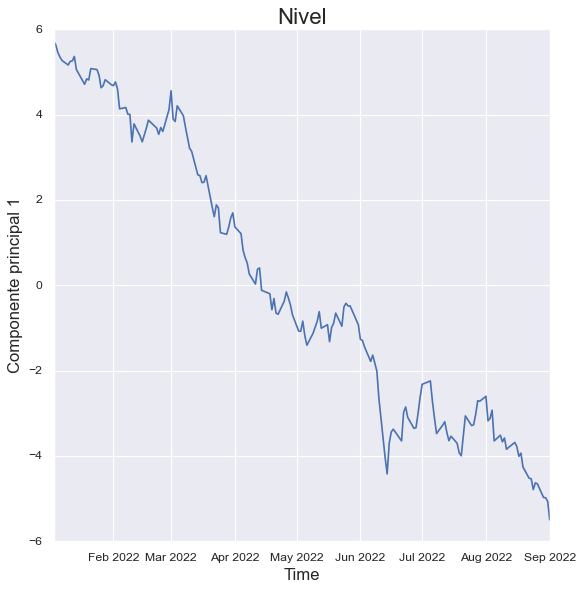

In [ ]:
pca1 = dfpca["Componente 1"]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Componente principal 1', fontsize = 15)
ax.set_title('Nivel', fontsize = 20)
plt.plot(rates.index,pca1)

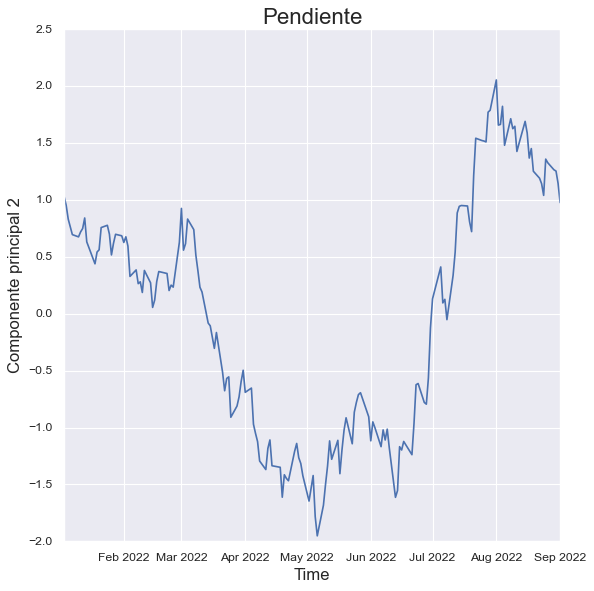

In [ ]:
pca2 = dfpca["Componente 2"]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('Pendiente', fontsize = 20)
plt.plot(rates.index,pca2)

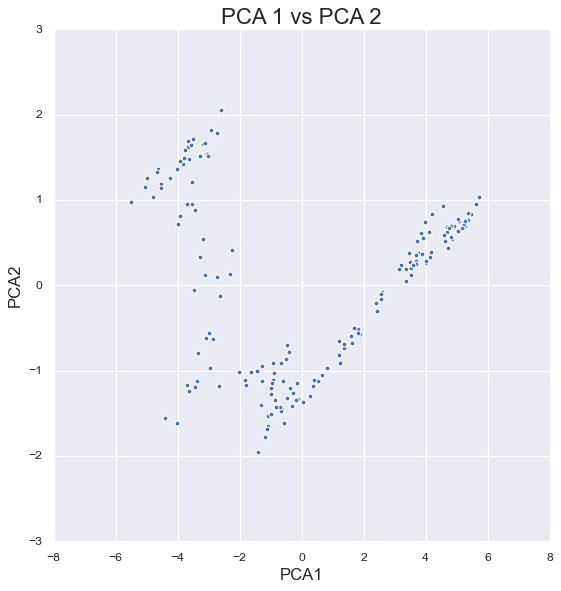

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('PCA 1 vs PCA 2', fontsize = 20)
plt.scatter(pca1,pca2)

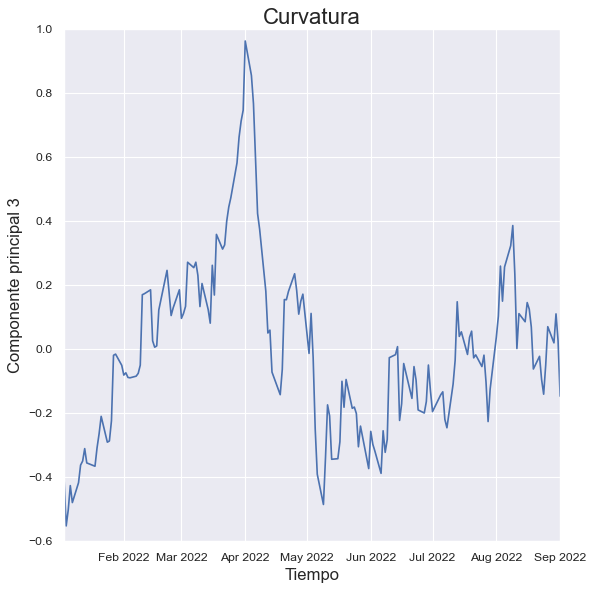

In [ ]:
pca3 = dfpca["Componente 3"]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Tiempo', fontsize = 15)
ax.set_ylabel('Componente principal 3', fontsize = 15)
ax.set_title('Curvatura', fontsize = 20)
plt.plot(rates.index,pca3)